In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
df=pd.read_csv("Global YouTube Statistics.csv", encoding='latin-1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

Data cleaning and preprocessing

In [ ]:
df.isna().sum().sort_values(ascending=False)

subscribers_for_last_30_days               337
Latitude                                   123
Urban_population                           123
Longitude                                  123
Population                                 123
Gross tertiary education enrollment (%)    123
Unemployment rate                          123
Abbreviation                               122
Country                                    122
country_rank                               116
video_views_for_the_last_30_days            56
category                                    46
channel_type_rank                           33
channel_type                                30
created_month                                5
created_year                                 5
created_date                                 5
video_views_rank                             1
rank                                         0
Youtuber                                     0
Title                                        0
uploads      

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w_]', '', regex=True)
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title',
       'uploads', 'country', 'abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'gross_tertiary_education_enrollment_', 'population',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   rank                                  995 non-null    int64  
 1   youtuber                              995 non-null    object 
 2   subscribers                           995 non-null    int64  
 3   video_views                           995 non-null    float64
 4   category                              949 non-null    object 
 5   title                                 995 non-null    object 
 6   uploads                               995 non-null    int64  
 7   country                               873 non-null    object 
 8   abbreviation                          873 non-null    object 
 9   channel_type                          965 non-null    object 
 10  video_views_rank                      994 non-null    float64
 11  country_rank       

In [8]:
df.select_dtypes(include='object').head()

,youtuber,category,title,country,abbreviation,channel_type,created_month
0,T-Series,Music,T-Series,India,IN,Music,Mar
1,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar
2,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb
3,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep
4,SET India,Shows,SET India,India,IN,Entertainment,Sep


In [9]:
df['video_views'] = pd.to_numeric(df['video_views'], errors='coerce')
df['subscribers'] = pd.to_numeric(df['subscribers'], errors='coerce')

In [10]:
if {'created_year', 'created_month', 'created_date'}.issubset(df.columns):
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['created_month_num'] = df['created_month'].map(month_map)
    df['created_at'] = pd.to_datetime(dict(
        year=pd.to_numeric(df['created_year'], errors='coerce'),
        month=df['created_month_num'].fillna(1).astype(int),
        day=pd.to_numeric(df['created_date'], errors='coerce').fillna(1).astype(int)
    ), errors='coerce')


In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   rank                                  995 non-null    int64         
 1   youtuber                              995 non-null    object        
 2   subscribers                           995 non-null    int64         
 3   video_views                           995 non-null    float64       
 4   category                              949 non-null    object        
 5   title                                 995 non-null    object        
 6   uploads                               995 non-null    int64         
 7   country                               873 non-null    object        
 8   abbreviation                          873 non-null    object        
 9   channel_type                          965 non-null    object        
 10  vi

,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,...,created_month,created_date,gross_tertiary_education_enrollment_,population,unemployment_rate,urban_population,latitude,longitude,created_month_num,created_at
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,NaN,2006-01-13
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,NaN,2006-01-05
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,NaN,2012-01-20
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,NaN,2006-01-01
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,NaN,2006-01-20


In [12]:
df.columns.tolist()

['rank',
 'youtuber',
 'subscribers',
 'video_views',
 'category',
 'title',
 'uploads',
 'country',
 'abbreviation',
 'channel_type',
 'video_views_rank',
 'country_rank',
 'channel_type_rank',
 'video_views_for_the_last_30_days',
 'lowest_monthly_earnings',
 'highest_monthly_earnings',
 'lowest_yearly_earnings',
 'highest_yearly_earnings',
 'subscribers_for_last_30_days',
 'created_year',
 'created_month',
 'created_date',
 'gross_tertiary_education_enrollment_',
 'population',
 'unemployment_rate',
 'urban_population',
 'latitude',
 'longitude',
 'created_month_num',
 'created_at']

In [13]:
numeric_columns = [
    'rank', 'subscribers', 'video_views', 'uploads',
    'video_views_rank', 'country_rank', 'channel_type_rank',
    'video_views_for_the_last_30_days',
    'lowest_monthly_earnings', 'highest_monthly_earnings',
    'lowest_yearly_earnings', 'highest_yearly_earnings',
    'subscribers_for_last_30_days',
    'gross_tertiary_education_enrollment_',
    'population', 'unemployment_rate', 'urban_population',
    'latitude', 'longitude'
]

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Confirm conversion
df[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   rank                                  995 non-null    int64  
 1   subscribers                           995 non-null    int64  
 2   video_views                           995 non-null    float64
 3   uploads                               995 non-null    int64  
 4   video_views_rank                      994 non-null    float64
 5   country_rank                          879 non-null    float64
 6   channel_type_rank                     962 non-null    float64
 7   video_views_for_the_last_30_days      939 non-null    float64
 8   lowest_monthly_earnings               995 non-null    float64
 9   highest_monthly_earnings              995 non-null    float64
 10  lowest_yearly_earnings                995 non-null    float64
 11  highest_yearly_earn

In [14]:
month_map = {
    'Jan': 1, 'January': 1,
    'Feb': 2, 'February': 2,
    'Mar': 3, 'March': 3,
    'Apr': 4, 'April': 4,
    'May': 5,
    'Jun': 6, 'June': 6,
    'Jul': 7, 'July': 7,
    'Aug': 8, 'August': 8,
    'Sep': 9, 'September': 9,
    'Oct': 10, 'October': 10,
    'Nov': 11, 'November': 11,
    'Dec': 12, 'December': 12
}

df['created_month_num'] = df['created_month'].map(month_map)


In [ ]:
df['created_at'] = pd.to_datetime(
    dict(
        year=pd.to_numeric(df['created_year'], errors='coerce'),
        month=df['created_month_num'].fillna(1).astype(int),
        day=pd.to_numeric(df['created_date'], errors='coerce').fillna(1).astype(int)
    ),
    errors='coerce'
)

df[['created_year', 'created_month', 'created_date', 'created_at']].head()


,created_year,created_month,created_date,created_at
0,2006.0,Mar,13.0,2006-03-13
1,2006.0,Mar,5.0,2006-03-05
2,2012.0,Feb,20.0,2012-02-20
3,2006.0,Sep,1.0,2006-09-01
4,2006.0,Sep,20.0,2006-09-20


Exploratory Data Analysis

In [16]:
print("Rows and columns:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
df.head()

Rows and columns: (995, 30)

Column names:
 ['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title', 'uploads', 'country', 'abbreviation', 'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'created_month', 'created_date', 'gross_tertiary_education_enrollment_', 'population', 'unemployment_rate', 'urban_population', 'latitude', 'longitude', 'created_month_num', 'created_at']


,rank,youtuber,subscribers,video_views,category,title,uploads,country,abbreviation,channel_type,...,created_month,created_date,gross_tertiary_education_enrollment_,population,unemployment_rate,urban_population,latitude,longitude,created_month_num,created_at
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,3.0,2006-03-13
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,3.0,2006-03-05
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2.0,2012-02-20
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,9.0,2006-09-01
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,9.0,2006-09-20


In [17]:
#  missing values in all columns
df.isna().sum().sort_values(ascending=False).head(15)

subscribers_for_last_30_days            337
gross_tertiary_education_enrollment_    123
latitude                                123
longitude                               123
unemployment_rate                       123
urban_population                        123
population                              123
abbreviation                            122
country                                 122
country_rank                            116
video_views_for_the_last_30_days         56
category                                 46
channel_type_rank                        33
channel_type                             30
created_month                             5
dtype: int64

In [18]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
rank,995.0,498.0,1.0,249.5,498.0,746.5,995.0,287.37606
subscribers,995.0,22982412.060302,12300000.0,14500000.0,17700000.0,24600000.0,245000000.0,17526105.340936
video_views,995.0,11039537052.038191,0.0,4288145410.0,7760819588.0,13554701853.0,228000000000.0,14110844376.829668
uploads,995.0,9187.125628,0.0,194.5,729.0,2667.5,301308.0,34151.352254
video_views_rank,994.0,554248.904427,1.0,323.0,915.5,3584.5,4057944.0,1362782.209881
country_rank,879.0,386.05347,1.0,11.0,51.0,123.0,7741.0,1232.244746
channel_type_rank,962.0,745.719335,1.0,27.0,65.5,139.75,7741.0,1944.386561
video_views_for_the_last_30_days,939.0,175610284.794462,1.0,20137500.0,64085000.0,168826500.0,6589000000.0,416378166.206619
lowest_monthly_earnings,995.0,36886.148281,0.0,2700.0,13300.0,37900.0,850900.0,71858.724092
highest_monthly_earnings,995.0,589807.847588,0.0,43500.0,212700.0,606800.0,13600000.0,1148622.478478


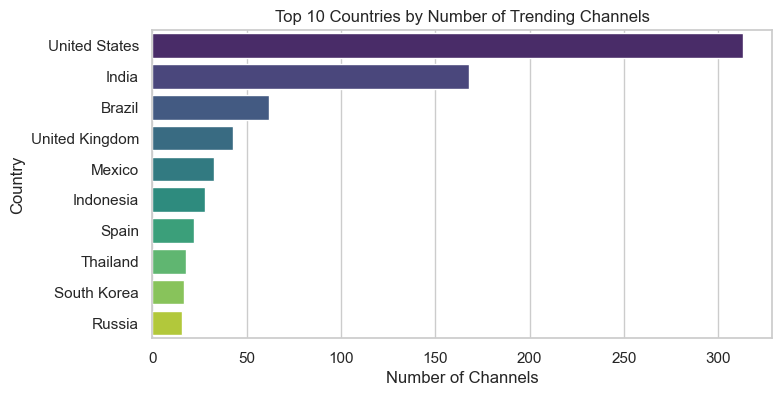

In [20]:
op_countries = df['country'].value_counts().head(10)
df_top = top_countries.reset_index()
df_top.columns = ['country','count']

plt.figure(figsize=(8,4))
ax = sns.barplot(data=df_top, x='count', y='country', hue='country', palette='viridis', dodge=False)
leg = ax.get_legend()
if leg:
    leg.remove()   # hide the legend so plot looks the same as before
plt.title("Top 10 Countries by Number of Trending Channels")
plt.xlabel("Number of Channels")
plt.ylabel("Country")
plt.show()

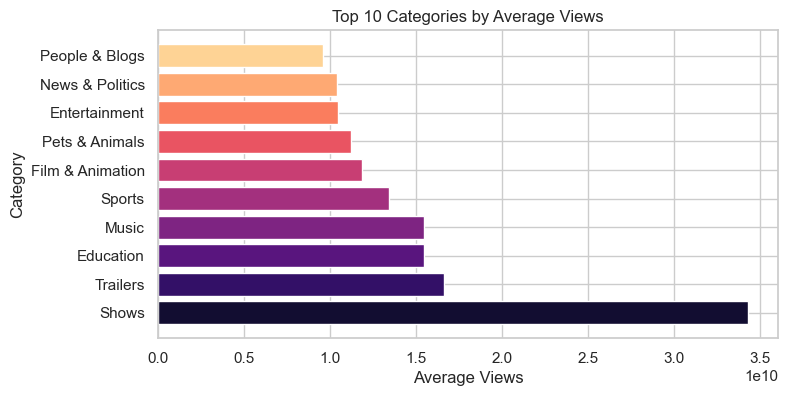

In [23]:
cat_avg_views = df.groupby('category')['video_views'].mean().sort_values(ascending=False).head(10)
colors = sns.color_palette("magma", len(cat_avg_views))

plt.figure(figsize=(8,4))
plt.barh(cat_avg_views.index, cat_avg_views.values, color=colors)
plt.title("Top 10 Categories by Average Views")
plt.xlabel("Average Views")
plt.ylabel("Category")
plt.show()

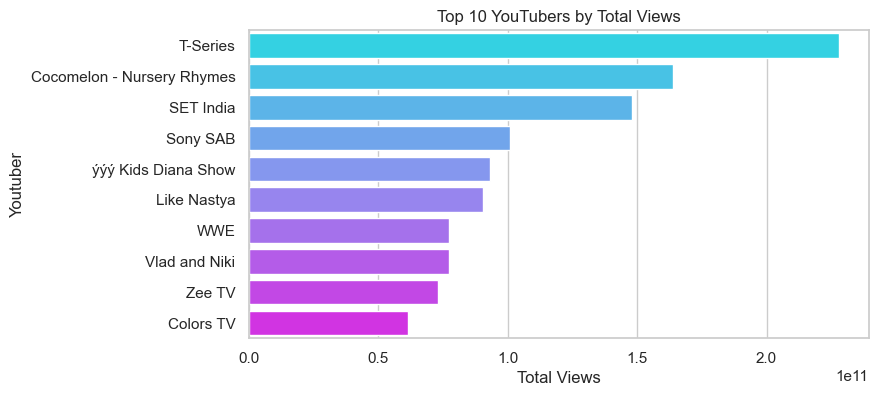

In [25]:
plt.figure(figsize=(8,4))
sns.barplot(x=top_youtubers.values, y=top_youtubers.index, hue=top_youtubers.index, palette="cool", legend=False)
plt.title("Top 10 YouTubers by Total Views")
plt.xlabel("Total Views")
plt.ylabel("Youtuber")
plt.show()


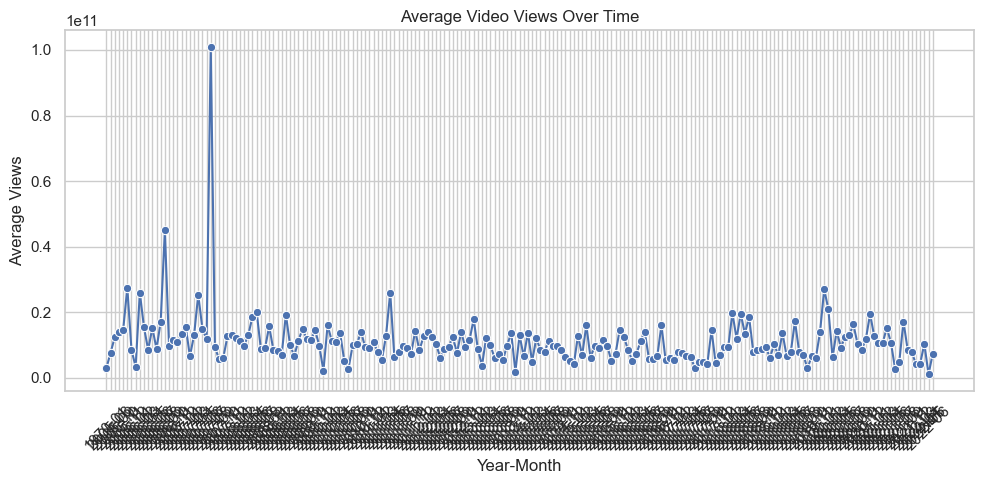

In [26]:
# Group by year and month for trend over time
df['year_month'] = df['created_at'].dt.to_period('M').astype(str)

views_over_time = (
    df.groupby('year_month')['video_views']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(data=views_over_time, x='year_month', y='video_views', marker='o')
plt.title("Average Video Views Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

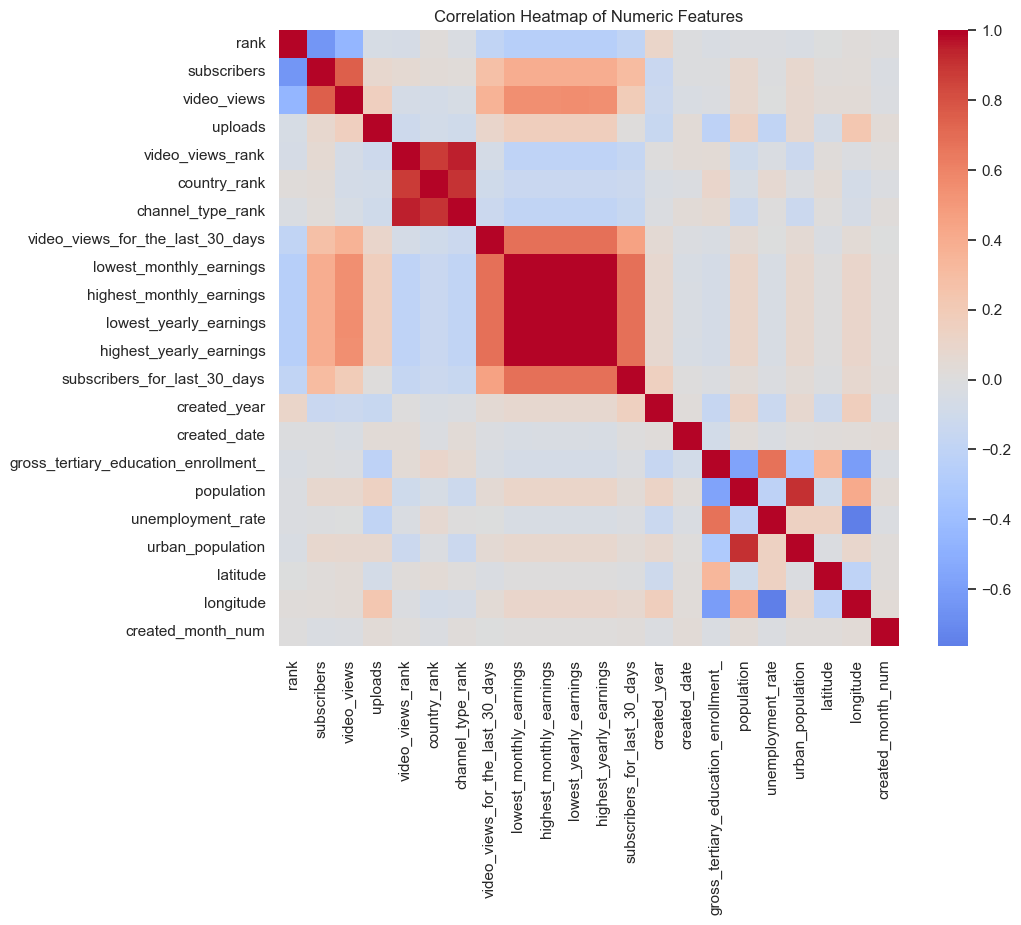

In [27]:
# Select numeric columns
num_df = df.select_dtypes(include=['number'])

# Compute correlations
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [28]:
corr['video_views'].sort_values(ascending=False).head(10)

video_views                         1.000000
subscribers                         0.750958
lowest_yearly_earnings              0.552776
lowest_monthly_earnings             0.552096
highest_yearly_earnings             0.552091
highest_monthly_earnings            0.551455
video_views_for_the_last_30_days    0.361856
subscribers_for_last_30_days        0.187384
uploads                             0.165928
population                          0.080214
Name: video_views, dtype: float64

Sentiment Analysis 

In [29]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 2.3 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 3.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 2.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.0 MB/s  0:00:00

   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from textblob import TextBlob

In [33]:
# Fill missing titles with empty string
df['title'] = df['title'].fillna("")

# Compute sentiment polarity (-1 = negative, 0 = neutral, 1 = positive)
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Quick check
df[['title', 'title_sentiment']].head(10)

,title,title_sentiment
0,T-Series,0.0
1,youtubemovies,0.0
2,MrBeast,0.0
3,Cocomelon - Nursery Rhymes,0.0
4,SET India,0.0
5,Music,0.0
6,ýýý Kids Diana Show,0.0
7,PewDiePie,0.0
8,Like Nastya Vlog,0.0
9,Vlad and Niki,0.0


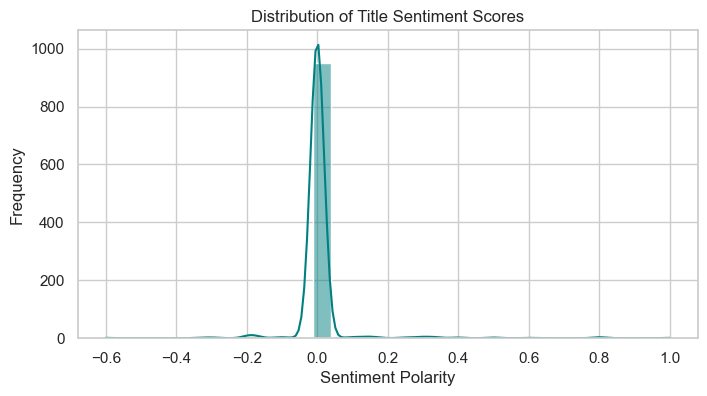

In [34]:
plt.figure(figsize=(8,4))
sns.histplot(df['title_sentiment'], bins=30, kde=True, color='teal')
plt.title("Distribution of Title Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

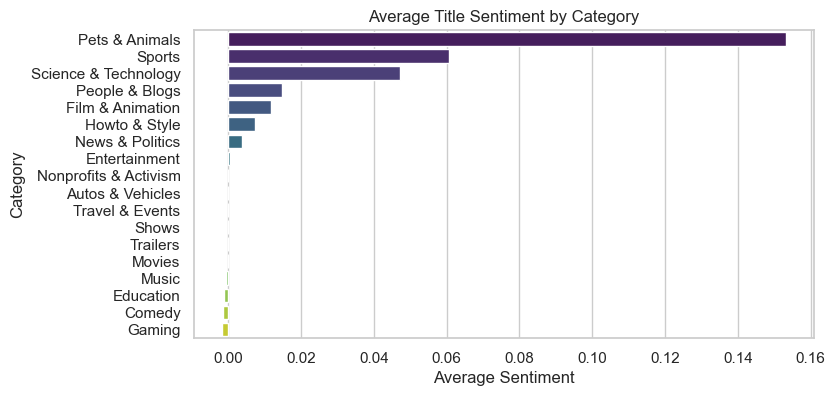

In [35]:
sentiment_by_category = df.groupby('category')['title_sentiment'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=sentiment_by_category.values, y=sentiment_by_category.index, hue=sentiment_by_category.index, palette="viridis", legend=False)
plt.title("Average Title Sentiment by Category")
plt.xlabel("Average Sentiment")
plt.ylabel("Category")
plt.show()

SQL-Style Analysis

In [36]:
category_rank = (
    df.groupby('category')['video_views']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

category_rank.head(10)

,category,video_views
0,Shows,3.432360e+10
1,Trailers,1.663136e+10
2,Education,1.548032e+10
3,Music,1.545286e+10
4,Sports,1.345330e+10
5,Film & Animation,1.183527e+10
6,Pets & Animals,1.121669e+10
7,Entertainment,1.048854e+10
8,News & Politics,1.039969e+10
9,People & Blogs,9.589327e+09


In [37]:
top_uploaders = (
    df.groupby('youtuber')['uploads']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_uploaders

youtuber
ABP NEWS               301308
GMA Integrated News    296272
TV9 Bharatvarsh        293516
Aaj Tak                283775
IndiaTV                273255
KOMPASTV               269050
Thairath Online        244899
News 24                211620
ABS-CBN News           209520
TEDx Talks             200933
Name: uploads, dtype: int64

In [38]:
region_avg_views = (
    df.groupby('country')['video_views']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

region_avg_views.head(10)

,country,video_views
0,Turkey,2.309981e+10
1,Cuba,2.293663e+10
2,Barbados,2.247775e+10
3,Latvia,2.091940e+10
4,Pakistan,1.888224e+10
5,Jordan,1.769669e+10
6,Japan,1.713640e+10
7,Argentina,1.495503e+10
8,Thailand,1.468433e+10
9,Russia,1.456227e+10


In [39]:
category_country_views = (
    df.groupby(['country', 'category'])['video_views']
    .mean()
    .reset_index()
    .sort_values(by='video_views', ascending=False)
)

category_country_views.head(10)

,country,category,video_views
64,India,Shows,6.913544e+10
140,Turkey,Music,5.610609e+10
26,Canada,Education,4.490090e+10
107,Russia,Film & Animation,3.645873e+10
97,Pakistan,Entertainment,3.430792e+10
77,Japan,Gaming,2.905804e+10
7,Argentina,Music,2.841424e+10
153,United Kingdom,Howto & Style,2.623679e+10
50,Germany,Entertainment,2.338659e+10
60,India,Music,2.322846e+10


In [40]:
# Export the cleaned dataset
df.to_csv("youtube_cleaned_dataset.csv", index=False)
print("✅ Cleaned dataset saved as 'youtube_cleaned_dataset.csv'")

✅ Cleaned dataset saved as 'youtube_cleaned_dataset.csv'
